In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
import chart_studio.plotly as py

In [14]:
import plotly.graph_objs as go
from plotly.offline import plot

In [27]:
# for offline plotting

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [5]:
data = pd.read_csv('stock_price.csv')

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [9]:
data.shape

(1009, 7)

## hence we can say there are no missing values in the data

In [11]:
data.isnull().sum()    # no null values exists

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [17]:
# now we are converting date column into date-time format using pandas library and (to_datetime) function

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
print(f'DataFrame contains stock prices between {data.Date.min()} {data.Date.max()}')

DataFrame contains stock prices between 2018-02-05 00:00:00 2022-02-04 00:00:00


In [20]:
print(f' Total Days = {(data.Date.max() - data.Date.min()).days} days')

 Total Days = 1460 days


In [21]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


<AxesSubplot:>

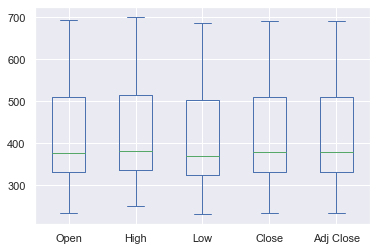

In [22]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [24]:
# setting the layout for our plot
layout = go.Layout(
    title = 'Stock Rrice Prediction',
    xaxis= dict(
        title = 'Date',
        titlefont=dict(
            family = 'Courier New, monospace',
            size = 18,
            color ='#7f7f7f'
        )
    ),
    yaxis = dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size = 18,
            color ='#7f7f7f'
        )
    )
)

stock_data = [{'x':data['Date'],'y':data['Close']}]
plot = go.Figure(data= stock_data,layout=layout)

In [26]:
# plotting offline now

iplot(plot)

##from the graph we can observe that during jul-2018 to jan-2020 the stock prices are not as much as expected. But from jul 2020 the stock prices grew higher

## Now building the regression model

In [28]:
# for preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [29]:
# for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [30]:
# now split the data into train and test sets

x = np.array(data.index).reshape(-1,1)
y = data['Close']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state=335)

In [32]:
# now feature scaling

In [33]:
scaler = StandardScaler()

In [34]:
x_scaled = scaler.fit(x_train)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# creating linear model

lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [37]:
# plotting actual and predicted values for train dataset

In [38]:
trace0 = go.Scatter(
    x = x_train.T[0],
    y = y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = x_train.T[0],
    y = lm.predict(x_train).T,
    mode = 'lines',
    name = 'Predicted'
)
stock_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=stock_data, layout = layout)

In [39]:
iplot(plot2)

In [40]:
# calculate scores for evaluating our mode

In [41]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, lm.predict(x_train))}\t{r2_score(y_test, lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train, lm.predict(x_train))}\t{mse(y_test, lm.predict(x_test))}
'''

print(scores)


Metric           Train                Test        
r2_score  0.7211106305195711	0.6795754604970445
MSE       3198.948905103629	3935.293508785703

